<a href="https://colab.research.google.com/github/Ruthnguli/Hypothyroidism-prediction/blob/main/Ruth_NGULI_DS_ML_WK3_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis 

## 1. Defining the Question

### a) Specifying the Question

To study and build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success

Measures of success will be achieved if the models chosen attains a accuracy score of 80%. 

### c) Understanding the context 

Hypothyroidism is a condition where thyroid glands do not produce enough thyroid hormones in the bloodstream lowering metabolism. The first hypothroidism was first described by Thomas Curling in 1850 and the cause and suitable treatment were established after 1883.
Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain. Hypothyroidism is treated by replacing thyroid hormones.



### d) Recording the Experimental Design

1. Uploading and reading data
2. Tyding data
3. Performing Exploratory Data Analysis
4. DEcision Trees Model: Random forests, Ada boosted trees, and Gradient boosted trees
5. Support Vector Machine model

## 2. Reading the Data

In [1]:
# import librariaes
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Dataset
#
hyp = pd.read_csv("hypothyroid.csv")

## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
hyp.shape

(3163, 26)

In [4]:
# Previewing the top of our dataset
#
hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
# Previewing the bottom of our dataset
# 
hyp.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
# Checking whether each column has an appropriate datatype
#
hyp.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

some Columns do not have appropriate data types. There are bool type columns such as on_thyroxine,six,pregnat,tumor. They need to be changed appropriately.

In [7]:
# Getting the information of the data
#
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [8]:
# checking column names 
#
hyp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [9]:
# Describing the data
#
hyp.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


## 4. Tidying the Dataset

In [10]:
# Aligning data and removing space
#
hyp.columns = hyp.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(','').str.replace(')','')

# confirming columns names
#
hyp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [11]:
# Checking for the unique values in each column
#
for column in hyp.columns:
  print(column)
  print(hyp[column].nunique())
  print(hyp[column].unique())
  print('\n')

status
2
['hypothyroid' 'negative']


age
93
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


sex
3
['M' 'F' '?']


on_thyroxine
2
['f' 't']


query_on_thyroxine
2
['f' 't']


on_antithyroid_medication
2
['f' 't']


thyroid_surgery
2
['f' 't']


query_hypothyroid
2
['f' 't']


query_hyperthyroid
2
['f' 't']


pregnant
2
['f' 't']


sick
2
['f' 't']


tumor
2
['f' 't']


lithium
2
['f' 't']


goitre
2
['f' 't']


tsh_measured
2
['y' 'n']


tsh
240
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34

It is observed that some columns e.g age,sex,tbg have a "?" which  does not have any link with the other values and can be interpreted as a missing value. Therefore we convert it to nan and deal with it.

In [12]:
# Replacing "?" with NAN
#
hyp.replace('?', np.NAN, inplace=True)

In [13]:
# Identifying the Missing Data
#
hyp.isna().sum().sum()

5329

There are 5329 identifiable missng values after replacing "?" missing sign value with NAN

In [14]:
# Checking for percentage of missing values 
#
(hyp.isna().mean().round(4) * 100).sort_values(ascending = False)

tbg                          91.78
t3                           21.97
tsh                          14.80
age                          14.10
tt4                           7.87
t4u                           7.84
fti                           7.81
sex                           2.31
tsh_measured                  0.00
tbg_measured                  0.00
fti_measured                  0.00
t4u_measured                  0.00
tt4_measured                  0.00
t3_measured                   0.00
status                        0.00
lithium                       0.00
tumor                         0.00
sick                          0.00
pregnant                      0.00
query_hyperthyroid            0.00
query_hypothyroid             0.00
thyroid_surgery               0.00
on_antithyroid_medication     0.00
query_on_thyroxine            0.00
on_thyroxine                  0.00
goitre                        0.00
dtype: float64

tbg column haas 91.8% of the data missing hence will be dropped. Filling missing values in the sex column (categorical) with the mode and the other missing values in numerical collumns with mean.

In [15]:
# Converting columns to appropriate data types
# 
num_col = hyp[['age','tsh','t3','tt4','t4u','fti']]

cat_col = hyp[['sex','status','tsh_measured','t3_measured','tt4_measured','t4u_measured','fti_measured','tbg_measured']]

bool_col = hyp[['on_thyroxine',	'query_on_thyroxine',	'on_antithyroid_medication',	'thyroid_surgery',	'query_hypothyroid',
            'query_hyperthyroid',	'pregnant',	'sick',	'tumor',	'lithium',	'goitre']]

# Replacing bool columns with True or False value
#
for column in bool_col:
  hyp[column] = hyp[column].replace('f', False)
  hyp[column] = hyp[column].replace('t', True)

# Using a for loop to change columns to their appriopriate datatypes
#
for column in hyp.columns:
  if column in num_col:
    hyp[column] = hyp[column].astype('float')
  elif column in cat_col:
    hyp[column] = hyp[column].astype('object')
  elif column in bool_col:
    hyp[column] = hyp[column].astype('bool')
  
# Previewing the column datatypes to check whether the changes have been effected
#
hyp.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                    bool
query_on_thyroxine              bool
on_antithyroid_medication       bool
thyroid_surgery                 bool
query_hypothyroid               bool
query_hyperthyroid              bool
pregnant                        bool
sick                            bool
tumor                           bool
lithium                         bool
goitre                          bool
tsh_measured                  object
tsh                          float64
t3_measured                   object
t3                           float64
tt4_measured                  object
tt4                          float64
t4u_measured                  object
t4u                          float64
fti_measured                  object
fti                          float64
tbg_measured                  object
tbg                           object
dtype: object

In [16]:
# Dealing with missing values
# Dropping tbg column with more than 90% of missing values 
#
hyp.drop(['tbg'], axis = 1, inplace = True)

# Filling missing values in the categorical column column with mode
#
hyp.sex.fillna(hyp.sex.mode()[0], inplace = True)

# Filling missing values in numerical columns with mean
#
col = hyp[['age','tsh','t3','tt4','t4u','fti']]
for column in col:
  hyp[column].fillna(hyp[column].mean(), inplace = True)
  
# Checking whether the missing values have been filled appriopriately
#
hyp.isnull().sum().any()

False

In [17]:
# Priview dataset to see the changes
#
hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,False,False,False,False,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,False,False,False,False,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,False,False,False,False,False,False,False,False,False,False,False,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,False,False,False,False,False,False,False,False,False,False,False,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,False,False,False,False,False,False,False,False,False,False,False,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [18]:
# Identifying duplicates
#
print(hyp.duplicated().any())

print(" ")

print(len(hyp[hyp.duplicated()]))

True
 
156


In [19]:
# Dealing with duplicates
#
hyp.drop_duplicates(keep='first', inplace=True)
hyp.duplicated().any()

False

In [20]:
# Checking for Outliers using box plots 
#
col_new = hyp [['age','tsh','t3','tt4','t4u','fti']]

fig,ax = plt.subplots(len(col_new),figsize = (20,40))

for i, col_val in enumerate(col_new):
  sns.boxplot(x=hyp[col_val], ax=ax[i])
  ax[i].set_title('{} Box Plot'.format(col_val))
  ax[i].set_xlabel(col_val, fontsize=10)

plt.show()

## 5. Exploratory Analysis

#a) Univariate

In [21]:
hyp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured'],
      dtype='object')

tsh - thyroid stimulating hormone 

T3 & T4 are hormones

t4u- thyroxine utilization rate

free thyroxine index (FTI). The FTI tells how much free T4 is present compared to bound T4. The FTI can help tell if abnormal amounts of T4 are present because of abnormal amounts of thyroxine-binding globulin.

The TBG blood test measures the level of a protein that moves thyroid hormone throughout your body

In [22]:
# describing the dataset
#
hyp.describe()

,age,tsh,t3,tt4,t4u,fti
count,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000
mean,51.350030,5.823557,1.934882,108.714583,0.977593,115.484252
std,17.864731,22.470602,0.876120,43.395720,0.219705,58.535310
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.154214,1.000000,1.939749,106.000000,0.970000,109.000000
75%,64.000000,5.300000,2.200000,125.000000,1.060000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


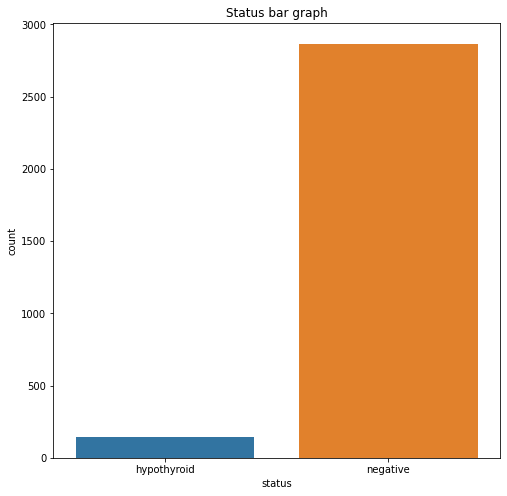

In [23]:
# Ploting bar graph of status 
#
plt.figure(figsize = [8,8])
sns.countplot(hyp['status'])
plt.title('Status bar graph')
plt.show();

Most of Thyroid patients had a negative status on hypothroidism.

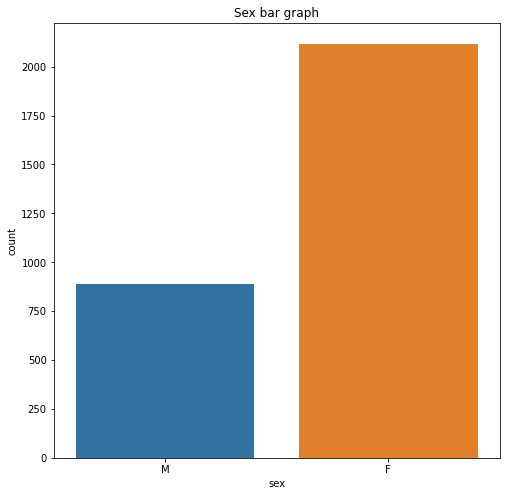

In [24]:
# Ploting bar graph of sex 
#
plt.figure(figsize = [8,8])
sns.countplot(hyp['sex'])
plt.title('Sex bar graph')
plt.show();

we obwerve that we had more female patients than male patients in out dataset.

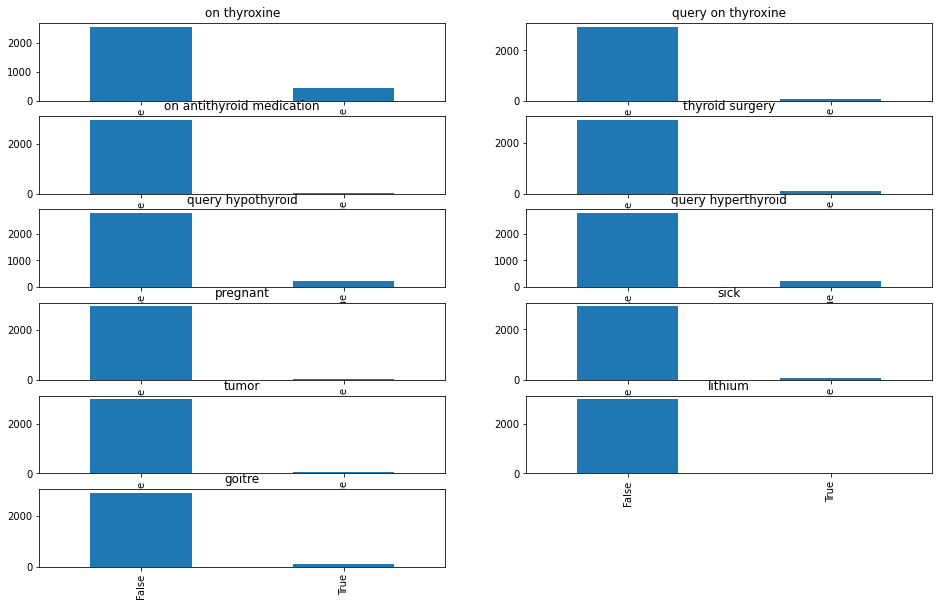

In [25]:
# Ploting bar graphs for 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
#'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre' columns 


# Set up a grid of plots
fig = plt.figure(figsize=(16,10)) 
fig_dims = (6, 2)


# Plot accidents depending on type
plt.subplot2grid(fig_dims, (0, 0))
hyp['on_thyroxine'].value_counts().plot(kind='bar', 
                                     title='on thyroxine')
plt.subplot2grid(fig_dims, (0, 1))
hyp['query_on_thyroxine'].value_counts().plot(kind='bar', 
                                     title= 'query on thyroxine' )
plt.subplot2grid(fig_dims, (1, 0))
hyp['on_antithyroid_medication'].value_counts().plot(kind='bar', 
                                     title='on antithyroid medication')
plt.subplot2grid(fig_dims, (1, 1))
hyp['thyroid_surgery'].value_counts().plot(kind='bar', 
                                     title='thyroid surgery')
plt.subplot2grid(fig_dims, (2, 0))
hyp['query_hypothyroid'].value_counts().plot(kind='bar', 
                                     title= 'query hypothyroid')
plt.subplot2grid(fig_dims, (2, 1))
hyp['query_hyperthyroid'].value_counts().plot(kind='bar', 
                                     title= 'query hyperthyroid' )
plt.subplot2grid(fig_dims, (3, 0))
hyp['pregnant'].value_counts().plot(kind='bar', 
                                     title='pregnant')
plt.subplot2grid(fig_dims, (3, 1))
hyp['sick'].value_counts().plot(kind='bar', 
                                     title='sick')
plt.subplot2grid(fig_dims, (4, 0))
hyp['tumor'].value_counts().plot(kind='bar', 
                                     title= 'tumor' )
plt.subplot2grid(fig_dims, (4, 1))
hyp['lithium'].value_counts().plot(kind='bar', 
                                     title='lithium')
plt.subplot2grid(fig_dims, (5, 0))
hyp['goitre'].value_counts().plot(kind='bar', 
                                     title='goitre')



We observe that most patients were neither having any other complication or under any medication during the test.

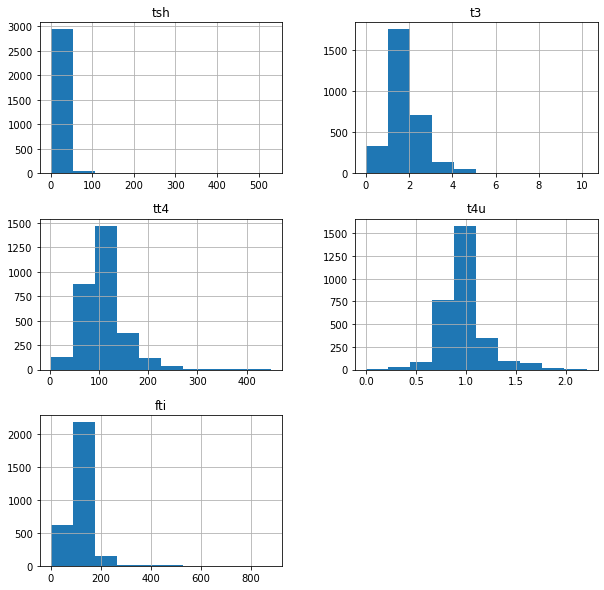

In [26]:
# Plotting Histograms of tsh,	t3,	tt4,	t4u,	fti
#
df = hyp[['tsh', 't3', 'tt4', 't4u', 'fti']]
df.hist(figsize=(10,10), sharex=False, sharey=False, xlabelsize= 10, ylabelsize=10)
plt.show();

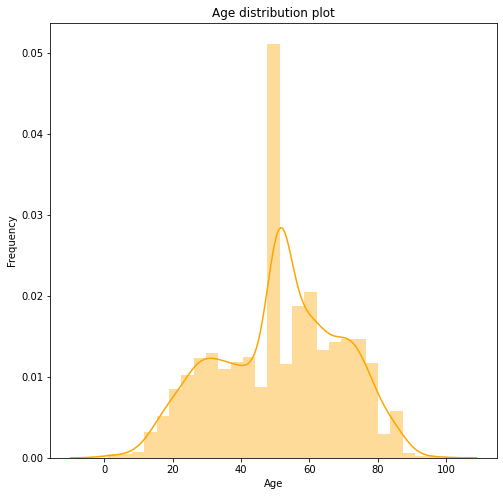

In [27]:
# Ploting a histogram to show age distribution
#
plt.figure(figsize = [8,8])
sns.distplot(hyp['age'], color = 'orange')
plt.title('Age distribution plot')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show();

The ages of patients are skewed to the left.

#b) Bivariate

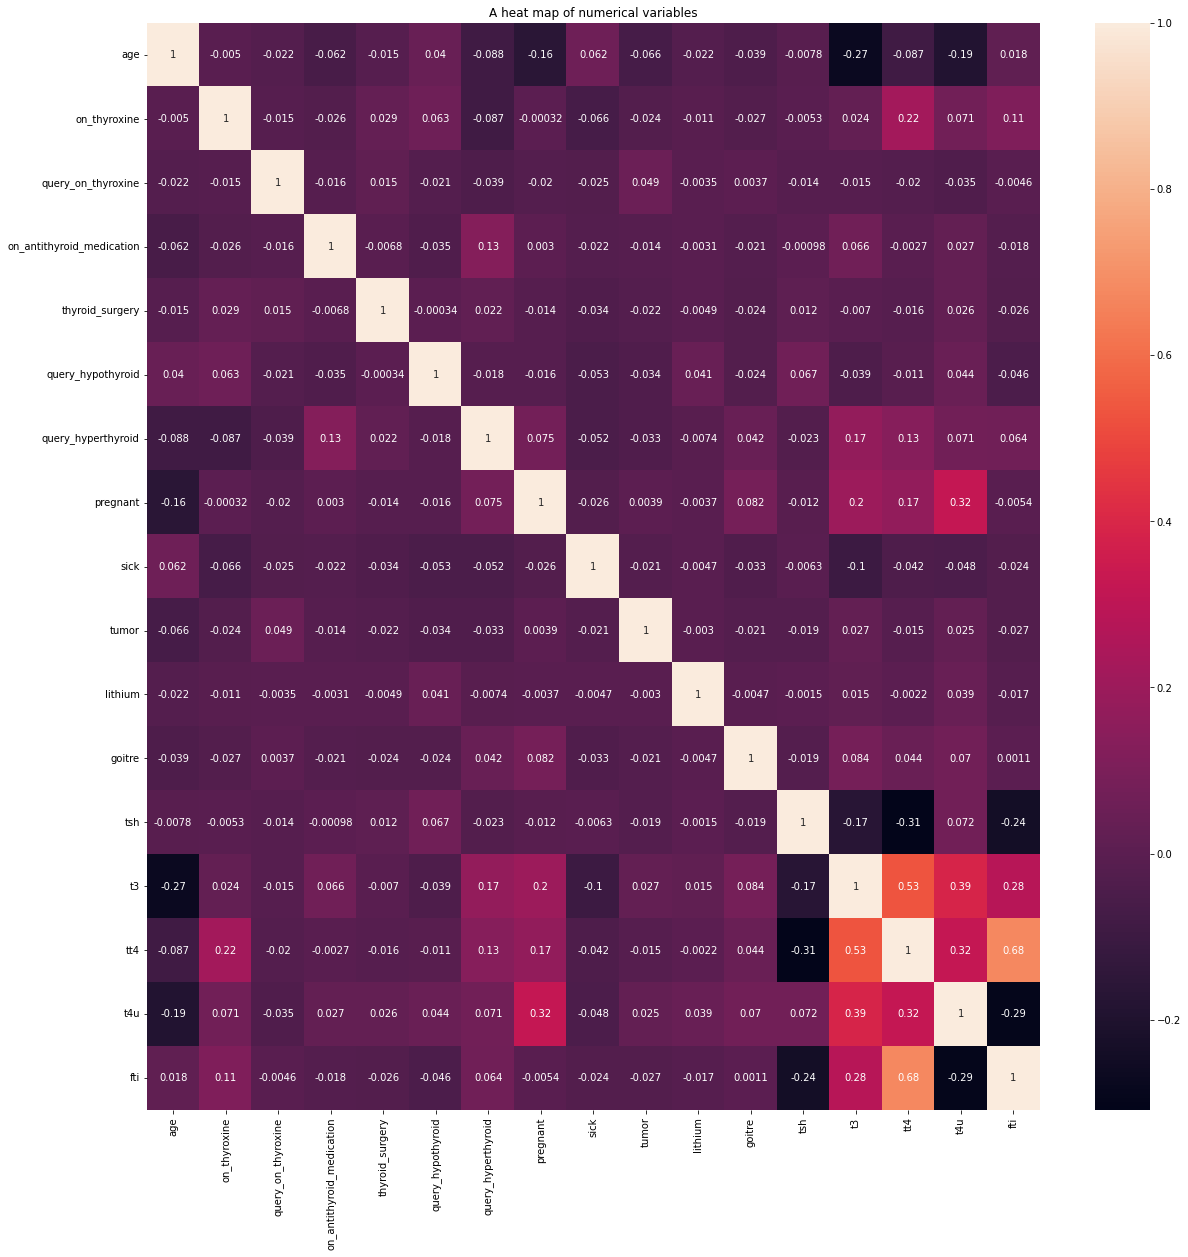

In [28]:
# Finding how variables are correlated using a heatmap
#
plt.figure(figsize=[20, 20])
sns.heatmap(hyp.corr(), annot=True)
plt.title('A heat map of numerical variables')
plt.show();

From the heatmap we observe that t4u (0.68) is strongly correlated to fti, t3 (0.53 to tt4 and pregnancy (0.32) is positively correlated to t4u therefore an increase in on variable would cause an increase in the other.

We also observe nigetaively correlated variables t3(-0.27), t4u (-0.19) is negatively corretated to age variable.

<Figure size 576x576 with 0 Axes>

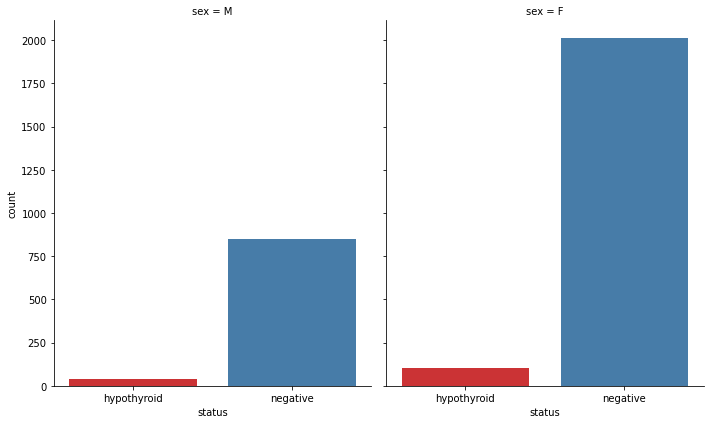

In [29]:
# plotting a bar plot to show the relationship between status and age 
#
plt.figure(figsize=[8,8])

sns.catplot("status", col="sex", col_wrap=4, data=hyp, kind="count", height=6, aspect=.8, palette='Set1')

plt.show();

According to the data the number of male and female patients who had a negatitive status is high than those whose status was hypothyroid.

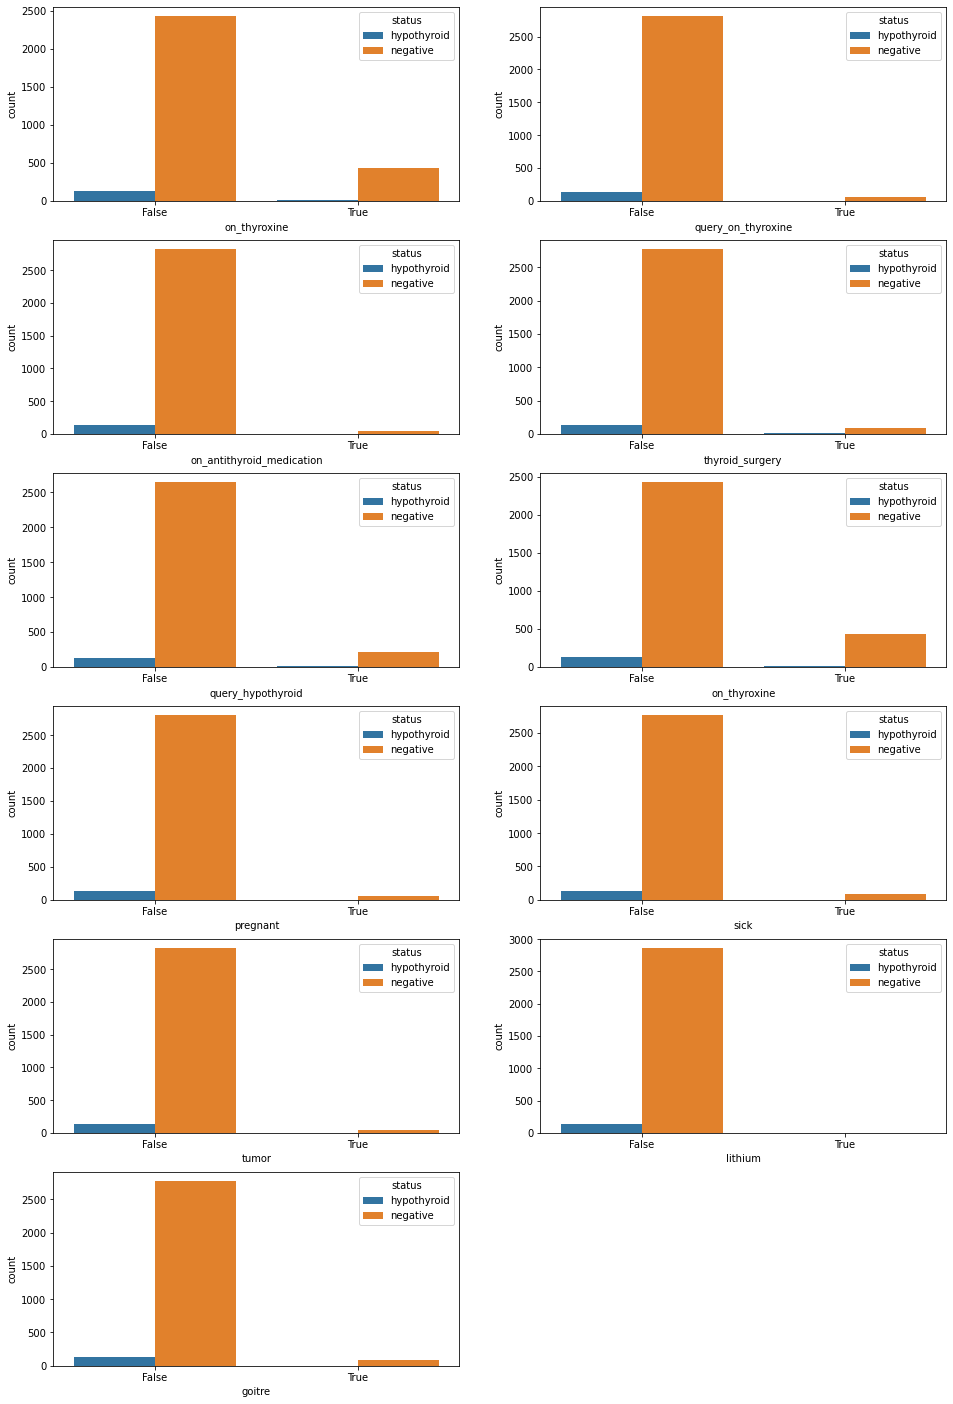

In [30]:
#Finding the relationship of 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
#'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre' columns' and status
#

fig = plt.figure(figsize=(16,25)) 
fig_dims = (6, 2)

plt.subplot2grid(fig_dims, (0, 0))
sns.countplot(x='on_thyroxine',hue='status',data=hyp)

plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(x='query_on_thyroxine',hue='status',data=hyp)

plt.subplot2grid(fig_dims, (1, 0))
sns.countplot(x='on_antithyroid_medication',hue='status',data=hyp)

plt.subplot2grid(fig_dims, (1, 1))
sns.countplot(x='thyroid_surgery',hue='status',data=hyp)

plt.subplot2grid(fig_dims, (2, 0))
sns.countplot(x='query_hypothyroid',hue='status',data=hyp)

plt.subplot2grid(fig_dims, (2, 1))
sns.countplot(x='on_thyroxine',hue='status',data=hyp)

plt.subplot2grid(fig_dims, (3, 0))
sns.countplot(x='pregnant',hue='status',data=hyp)

plt.subplot2grid(fig_dims, (3, 1))
sns.countplot(x='sick',hue='status',data=hyp)

plt.subplot2grid(fig_dims, (4, 0))
sns.countplot(x='tumor',hue='status',data=hyp)

plt.subplot2grid(fig_dims, (4, 1))
sns.countplot(x='lithium',hue='status',data=hyp)

plt.subplot2grid(fig_dims, (5, 0))
sns.countplot(x='goitre',hue='status',data=hyp)

It is observed that the most patients test had no symptons and neither were they diagnozed with hypothyroid.

<Figure size 720x720 with 0 Axes>

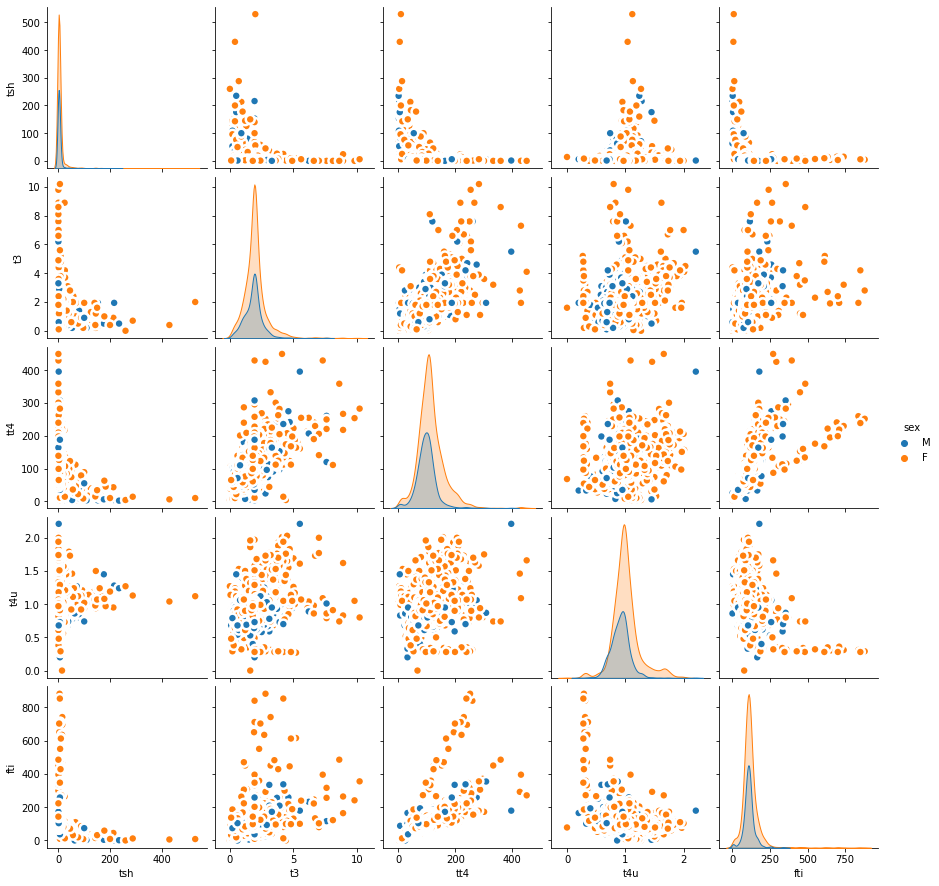

In [31]:
# A pair plot of 'tsh', 't3', 'tt4', 't4u', 'fti', 'sex' columns 
#
plt.figure(figsize =[10,10])
sns.pairplot(hyp[['tsh', 't3', 'tt4', 't4u', 'fti', 'sex']], kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

#c) Multivariate

In [32]:
# testing for normality for price
#
from scipy.stats import shapiro 

stat, p = shapiro(hyp['age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# 
#
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 
# testing for normality for GDP hrowth
#
stat, p = shapiro(hyp['age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
#
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.983, p=0.000
Sample does not look Gaussian
Statistics=0.983, p=0.000
Sample does not look Gaussian


## 7. Implementing the Solution

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

1: Decision trees:
- use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Optimize each of the 2 models
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction

2: SVM:
- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Tune your parameters to improve the performance of your model.Visualize the models you've created. Use any two features to build the models for this step.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

In [33]:
# Importing libraries
#
from io import StringIO
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action = 'ignore')


# 1.a) Random forest

In [34]:
# Selecting X and y variables
# 
X = hyp.drop(['status'], axis=1)
y = np.where(hyp.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)



In [35]:
# Training the data
# Train 80% of the data

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# train shape

print(X_train.shape)

(2405, 31)


In [36]:
# Fitting the model
# fit the model

forest = RandomForestClassifier()
model = forest.fit(X_train,y_train)


In [37]:
# predicting the model
#
y_pred = model.predict(X_test)

# Looking at the accuracy and f1 score and confusion matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
score = f1_score(y_test, y_pred)

print(f'The accuracy score is: {accuracy}')
print(f'The f1 score is: {score}')
print(f'{cm}')

The accuracy score is: 0.9883720930232558
The f1 score is: 0.8571428571428572
[[574   3]
 [  4  21]]


Feature importance

In [38]:
# Getting feature importances
#
importances = list(forest.feature_importances_)

# List of tuples with variable and importance

feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(X, importances)]

print(feature_importances) 
print()

# sorting the values in descending order to have important features first.

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Printing out the feature and importances 

[print('Feature {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.034), ('on_thyroxine', 0.007), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.007), ('thyroid_surgery', 0.005), ('query_hypothyroid', 0.006), ('query_hyperthyroid', 0.003), ('pregnant', 0.0), ('sick', 0.003), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.002), ('tsh', 0.253), ('t3', 0.072), ('tt4', 0.262), ('t4u', 0.048), ('fti', 0.271), ('sex_F', 0.004), ('sex_M', 0.005), ('tsh_measured_n', 0.003), ('tsh_measured_y', 0.005), ('t3_measured_n', 0.003), ('t3_measured_y', 0.002), ('tt4_measured_n', 0.0), ('tt4_measured_y', 0.0), ('t4u_measured_n', 0.0), ('t4u_measured_y', 0.0), ('fti_measured_n', 0.0), ('fti_measured_y', 0.0), ('tbg_measured_n', 0.002), ('tbg_measured_y', 0.002)]

Feature fti                  Importance: 0.271
Feature tt4                  Importance: 0.262
Feature tsh                  Importance: 0.253
Feature t3                   Importance: 0.072
Feature t4u                  Importance: 0.048
Feature age                  Importance: 0.034
Featu

Visualizing important features

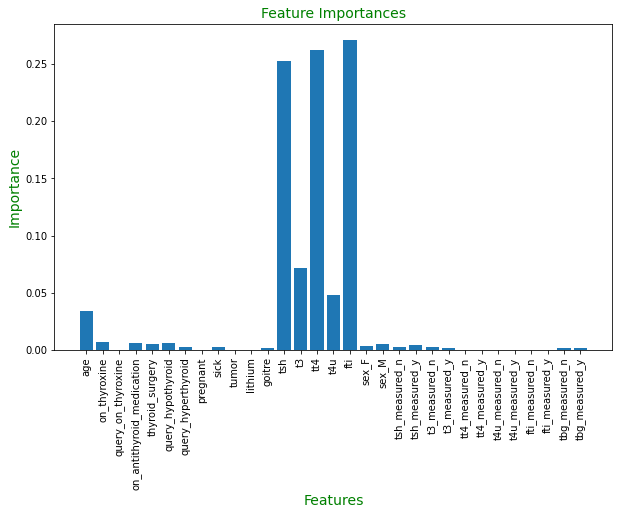

In [39]:
# list of x locations for plotting
#
x_values = list(range(len(importances)))

# Make a bar chart
#
plt.figure(figsize=[10,6])
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
#
plt.xticks(x_values, X, rotation='vertical')

# Axis labels and title
#
plt.ylabel('Importance', fontsize = 14, color = 'Green'); plt.xlabel('Features', fontsize = 14, color = 'Green');
plt.title('Feature Importances',fontsize = 14, color = 'Green');


We obsereve that the most important features are fti,tt4,tsh,t3,age,t4u,tsh_measured_y, on_antithyroid_medication, thyroid_surgery, on_thyroxine, query_hypothyroid,sick,tbg_measured_y,query_hyperthyroid,goitre,sex_F, sex_M,t3_measured_n,3_measured_y and tbg_measured_n to predict if a patient has hypothyroid.




Remodelling with the most important features

In [40]:
# Selecting X from important features and y
#

X1 = X[['fti','tt4','tsh','t3','age','t4u','tsh_measured_y', 'on_antithyroid_medication', 'thyroid_surgery',
       'on_thyroxine', 'query_hypothyroid','sick','tbg_measured_y','query_hyperthyroid',
       'goitre','sex_F', 'sex_M','t3_measured_n','t3_measured_y', 'tbg_measured_n']]

y1 = np.where(hyp.status == 'hypothyroid', 1, 0)

# Train 80% of the data

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1, test_size = 0.2, random_state = 0)

# fit the model

forest = RandomForestClassifier()
model = forest.fit(X1_train,y1_train)


# predicting the model
#
y1_pred = model.predict(X1_test)

# Looking at the accuracy and confusion matrix

cm = confusion_matrix(y1_test, y1_pred)
accuracy = accuracy_score(y1_test, y1_pred)
score = f1_score(y1_test, y1_pred)

print(f'The accuracy score is: {accuracy}')
print(f'The f1 score is: {score}')
print(f'{cm}')

The accuracy score is: 0.9916943521594684
The f1 score is: 0.8979591836734694
[[575   2]
 [  3  22]]


Hyperparameter Tuning

In [41]:
# using Gridsearchcv to tune
# Creating the parameter grid based on the results of random search 

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}


# Instantiate the grid search model

grid_search = GridSearchCV(estimator=forest, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")

# fitting x and y 

grid_search.fit(X1, y1)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [42]:
# Getting the best estimators
#
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)

In [43]:
# Applying the best parameters to the model
#
# Selecting X from important features and y
#

X2 = X[['fti','tt4','tsh','t3','age','t4u','tsh_measured_y', 'on_antithyroid_medication', 'thyroid_surgery',
       'on_thyroxine', 'query_hypothyroid','sick','tbg_measured_y','query_hyperthyroid',
       'goitre','sex_F', 'sex_M','t3_measured_n','t3_measured_y', 'tbg_measured_n']]

y2 = np.where(hyp.status == 'hypothyroid', 1, 0)

# Train 80% of the data

X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

forest = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       n_estimators=10, random_state=0)

tuned_model = forest.fit(X2_train,y2_train)

# predicting the model
#
y_tuned = tuned_model.predict(X2_test)

# Looking at the accuracy and confusion matrix

cm = confusion_matrix(y2_test, y_tuned)
accuracy = accuracy_score(y2_test, y_tuned)
score = f1_score(y2_test, y_tuned)

print(f'The accuracy score is: {accuracy}')
print(f'The f1 score is: {score}')
print(f'{cm}')

The accuracy score is: 0.9933554817275747
The f1 score is: 0.92
[[575   2]
 [  2  23]]


Cross-Validating the model

In [81]:
# Performing cross validation of ten folds
#

scores = cross_val_score(forest, X2, y2, cv = 10)

# Calculating the mean of the cross validation scores
#
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.01


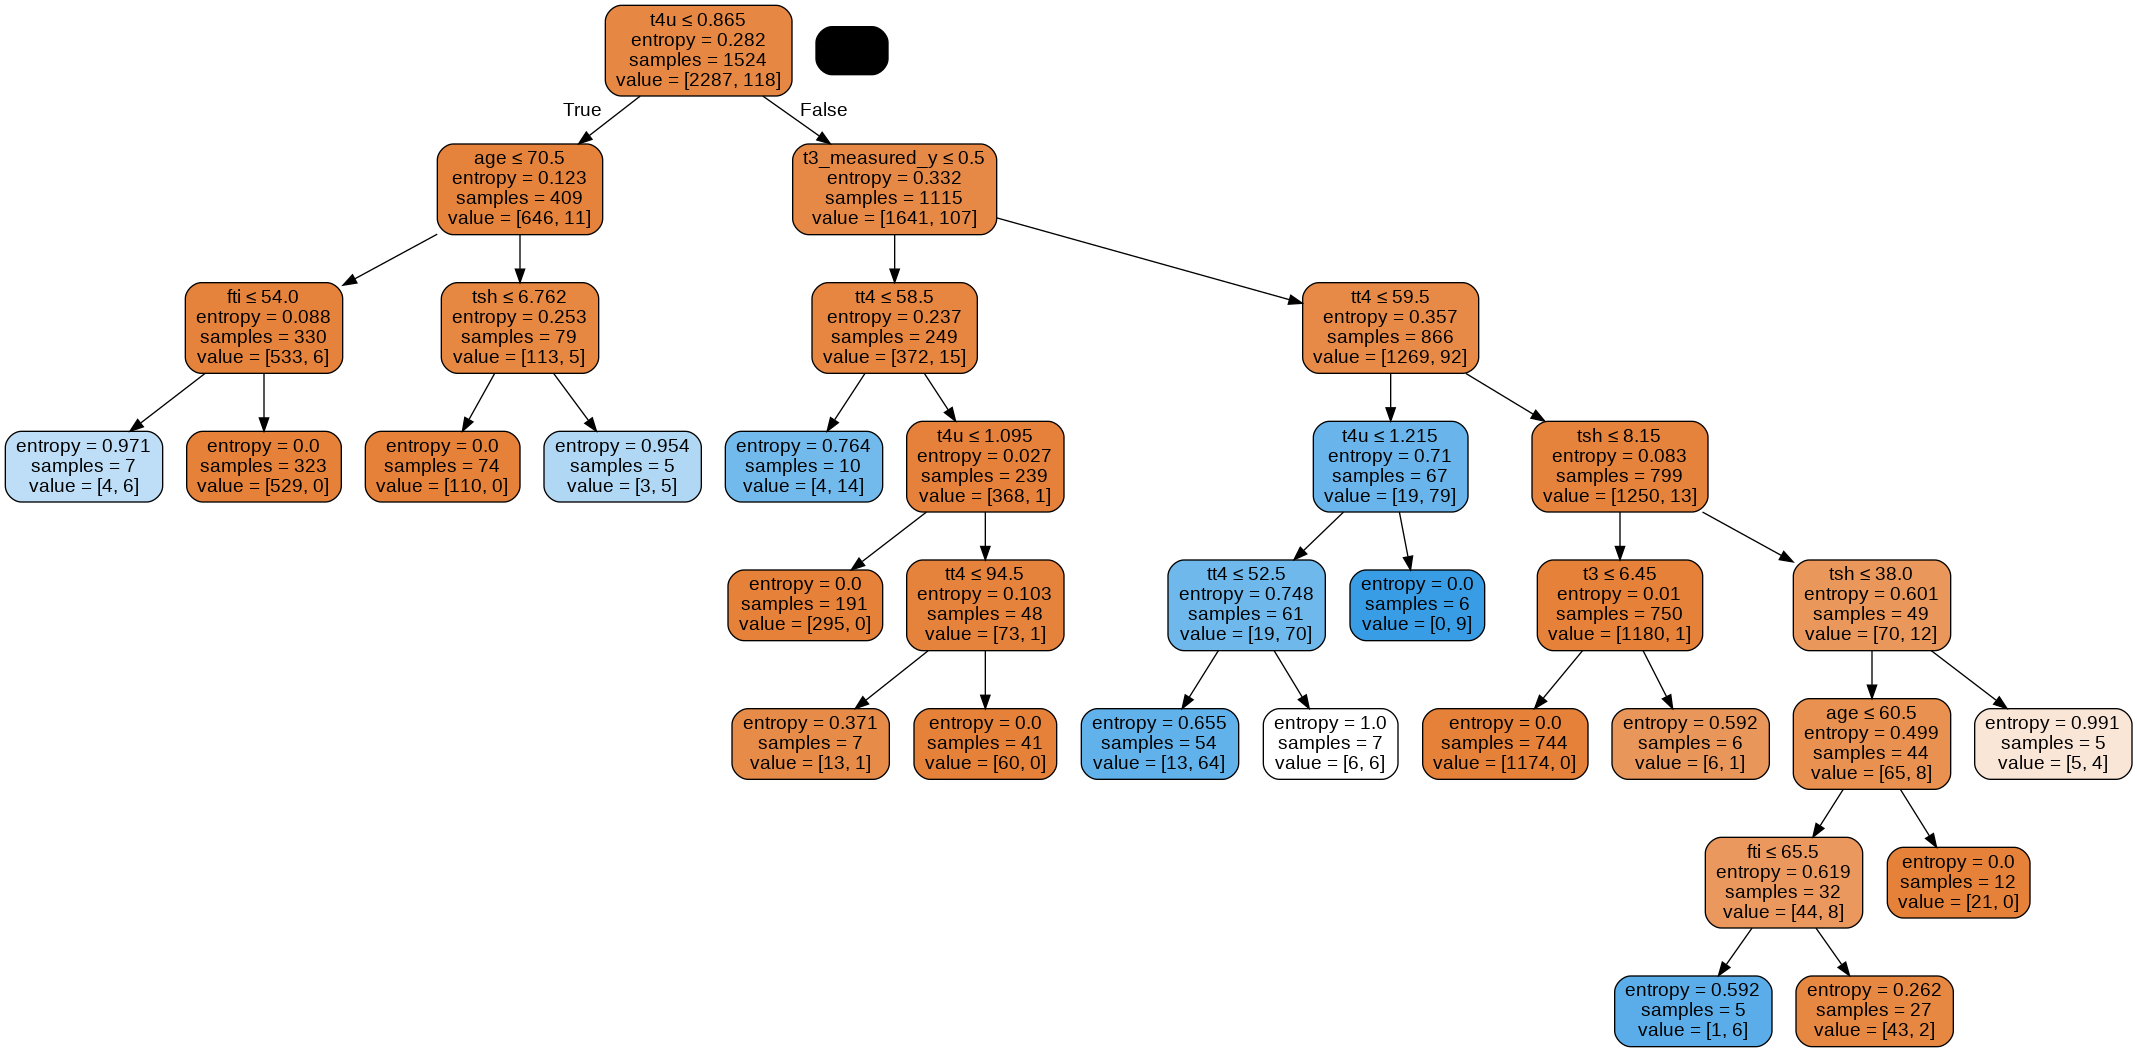

In [45]:
# Visualizing the tuned forest
#

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[5]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X2.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

#1.b) Ada boosted trees

In [46]:
# Selecting X and y variables
# 
X = hyp.drop(['status'], axis=1)
y = np.where(hyp.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)



In [47]:
# Train 80% of the data
#
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# train shape

print(X_train.shape)

(2405, 31)


In [48]:
# Fitting the model
# fit the model

ABC = AdaBoostClassifier()
model = ABC.fit(X_train,y_train)


In [49]:
# predicting the model
#
y_pred = model.predict(X_test)

# Looking at the accuracy,f1 score and confusion matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
score = f1_score(y_test, y_pred)

print(f'The accuracy score is: {accuracy}')
print(f'The f1 score is: {score}')
print(f'{cm}')

The accuracy score is: 0.9933554817275747
The f1 score is: 0.92
[[575   2]
 [  2  23]]


In [50]:
# Getting feature importances
#
importances = list(ABC.feature_importances_)

# List of tuples with variable and importance

feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(X, importances)]

print(feature_importances) 
print()

# sorting the values in descending order to have important features first.

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Printing out the feature and importances 

[print('Feature {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.16), ('on_thyroxine', 0.02), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.04), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.02), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh', 0.22), ('t3', 0.1), ('tt4', 0.16), ('t4u', 0.08), ('fti', 0.2), ('sex_F', 0.0), ('sex_M', 0.0), ('tsh_measured_n', 0.0), ('tsh_measured_y', 0.0), ('t3_measured_n', 0.0), ('t3_measured_y', 0.0), ('tt4_measured_n', 0.0), ('tt4_measured_y', 0.0), ('t4u_measured_n', 0.0), ('t4u_measured_y', 0.0), ('fti_measured_n', 0.0), ('fti_measured_y', 0.0), ('tbg_measured_n', 0.0), ('tbg_measured_y', 0.0)]

Feature tsh                  Importance: 0.22
Feature fti                  Importance: 0.2
Feature age                  Importance: 0.16
Feature tt4                  Importance: 0.16
Feature t3                   Importance: 0.1
Feature t4u                  Importance: 0.08
Feature on_antithyroid_medication Importance: 0.

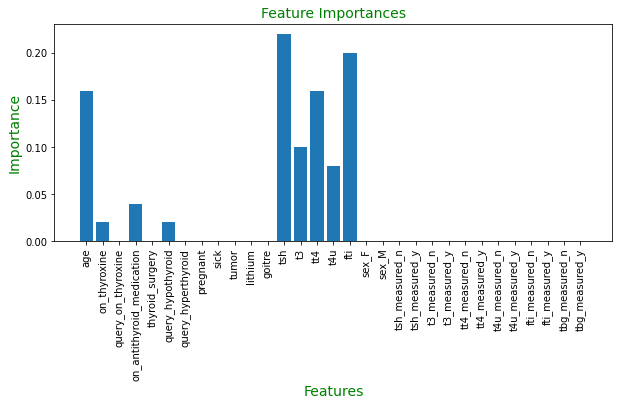

In [51]:
# list of x locations for plotting
#
x_values = list(range(len(importances)))

# Make a bar chart
#
plt.figure(figsize=[10,4])
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
#
plt.xticks(x_values, X, rotation='vertical')

# Axis labels and title
#
plt.ylabel('Importance', fontsize = 14, color = 'Green'); plt.xlabel('Features', fontsize = 14, color = 'Green');
plt.title('Feature Importances',fontsize = 14, color = 'Green');

It can be observed that the most important features are  fti, tt4, tsh, t3, age, t4u, on_antithyroid_medication,  on_thyroxine, query_hypothyroid.

Adaboost uses few features compared to random forest.

Remodelling with the most important features

In [52]:
# Selecting X from important features and y
#

X1 = X[['fti','tt4','tsh','t3','age','t4u', 'on_antithyroid_medication', 
       'on_thyroxine', 'query_hypothyroid',]]

y1 = np.where(hyp.status == 'hypothyroid', 1, 0)

# Train 80% of the data

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1, test_size = 0.2, random_state = 0)

# fit the model

ABC = AdaBoostClassifier()
model = ABC.fit(X1_train,y1_train)


# predicting the model
#
y1_pred = model.predict(X1_test)

# Looking at the accuracy and confusion matrix

cm = confusion_matrix(y1_test, y1_pred)
accuracy = accuracy_score(y1_test, y1_pred)
score = f1_score(y1_test, y1_pred)

print(f'The accuracy score is: {accuracy}')
print(f'The f1 score is: {f1_score}')
print(f'{cm}')


The accuracy score is: 0.9933554817275747
The f1 score is: <function f1_score at 0x7fee248e15f0>
[[575   2]
 [  2  23]]


In [53]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'learning_rate': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = AdaBoostClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X1, y1)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'learning_rate': 1, 'n_estimators': 10}


In [54]:
# Selecting X from important features and y
#

X = X[['fti','tt4','tsh','t3','age','t4u', 'on_antithyroid_medication', 
       'on_thyroxine', 'query_hypothyroid',]]

y = np.where(hyp.status == 'hypothyroid', 1, 0)

# Train 80% of the data

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# fit the model

ABC = AdaBoostClassifier(learning_rate=1, n_estimators=10, random_state = 0)
model = ABC.fit(X_train,y_train)


# predicting the model
#
y_pred = model.predict(X_test)

# Looking at the accuracy and confusion matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
score = f1_score(y_test, y_pred)

print(f'The accuracy score is: {accuracy}')
print(f'The f1 score is: {score}')
print(f'{cm}')

The accuracy score is: 0.9933554817275747
The f1 score is: 0.92
[[575   2]
 [  2  23]]


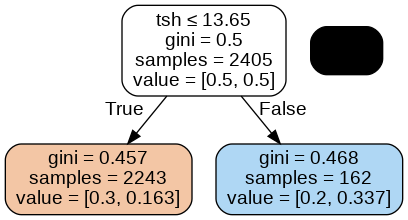

In [55]:
# Visualizing the tuned forest
#
dot_data = StringIO()
# pick a specific tree from the forest
tree = ABC.estimators_[5]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Cross validating the model

In [80]:
# Performing cross validation of 10 folds
#
scores = cross_val_score(ABC, X, y, cv = 10)

# Calculating the mean of the cross validation scores
#
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.01


Adaboost is the best performing model with a 99% accuracy score and  92 % f1 score compared to Random forest whose accuracy score 98% and  f1 score 85%.

#2.) Support Vector Machine

In [57]:
# Selecting X and y variables
# 
X = hyp.drop(['status'], axis=1)
y = np.where(hyp.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

In [58]:
# Training the data
# Train 80% of the data

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# train shape

print(X_train.shape)

(2405, 31)


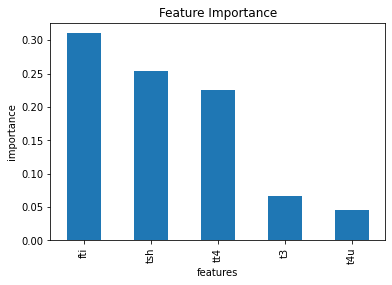

In [59]:
# using decision trees to give the most preferable features 
#
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importance = rf.feature_importances_

# Visualizing The important features
#
pd.Series(rf.feature_importances_, index=X.columns).nlargest(5).plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('features')
plt.ylabel('importance')
plt.show();

In [60]:
# Selecting X from the feature importance
#
X = X[['fti','tsh',]]

y = np.where(hyp.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)



In [61]:
# Training the data
# Train 80% of the data

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# train shape

print(X_train.shape)

(2405, 2)


In [62]:
# Standardising the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#2.a) polynomial kernel

In [63]:
# Fitting the model
# fit the model in polynomial function

poly = SVC(kernel = 'poly')
model = poly.fit(X_train,y_train)

# predicting the model

poly_pred = model.predict(X_test)

# model aCcuracy score

cm = confusion_matrix(y_test, poly_pred)
accuracy = accuracy_score(y_test, poly_pred)
score = f1_score(y_test, poly_pred)

print(f'The accuracy score is: {accuracy}')
print(f'The f1 score is: {score}')
print(f'{cm}')

The accuracy score is: 0.9833887043189369
The f1 score is: 0.782608695652174
[[574   3]
 [  7  18]]


#2.b) Linear Kernel

In [64]:
# Fitting the model
# fit the model in Linear function

linear = SVC(kernel = 'linear')
model = linear.fit(X_train,y_train)

# predicting the model

linear_pred = model.predict(X_test)

# model aCcuracy score

cm = confusion_matrix(y_test, linear_pred)
accuracy = accuracy_score(y_test, linear_pred)
score = f1_score(y_test, linear_pred)

print(f'The accuracy score is: {accuracy}')
print(f'The f1 score is: {score}')
print(f'{cm}')

The accuracy score is: 0.9800664451827242
The f1 score is: 0.7499999999999999
[[572   5]
 [  7  18]]


#2.c) rbf kernel

In [65]:
# Fitting the model
# fit the model in rbf function

rbf = SVC(kernel = 'rbf')
model = rbf.fit(X_train,y_train)

# predicting the model

rbf_pred = model.predict(X_test)

# model aCcuracy score

cm = confusion_matrix(y_test, rbf_pred)
accuracy = accuracy_score(y_test, rbf_pred)
score = f1_score(y_test, rbf_pred)

print(f'The accuracy score is: {accuracy}')
print(f'The f1 score is: {score}')
print(f'{cm}')

The accuracy score is: 0.9800664451827242
The f1 score is: 0.7391304347826089
[[573   4]
 [  8  17]]


The best kernel is polynomial kernel which has the highest f1 score of 78% followed by linear kernel 74% and rbf with 73%.

Hyperparameter tuning

In [76]:
# using Gridsearchcv to tune
# Creating the parameter grid based on the results of random search 

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'rbf']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'rbf']},
             verbose=2)

In [100]:
# Getting the best estimators
#
# print best parameter after tuning
print('Best Parameter: ',grid.best_params_)
 

Best Parameter:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Remodelling with Best Params

In [78]:
# Selecting X from the feature importance
#
X = X[['fti','tsh',]]

y = np.where(hyp.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)
# Training the data
# Train 80% of the data

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# Standardising the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# fit the model in rbf function

rbf = SVC(kernel = 'rbf', gamma = 0.1, C = 10)
model = rbf.fit(X_train,y_train)

# predicting the model

rbf_pred = model.predict(X_test)

# model aCcuracy score

cm = confusion_matrix(y_test, rbf_pred)
accuracy = accuracy_score(y_test, rbf_pred)
score = f1_score(y_test, rbf_pred)

print(f'The accuracy score is: {accuracy}')
print(f'The f1 score is: {score}')
print(f'{cm}')

The accuracy score is: 0.9850498338870431
The f1 score is: 0.7999999999999999
[[575   2]
 [  7  18]]


Cross-validation

In [79]:
# Performing cross validation of ten folds
#
scores = cross_val_score(rbf, X, y, cv=10)
# Calculating the mean of the cross validation scores
#
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.01


## 8. Challenging the solution

In [94]:
# Importing different classification models
#
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

# Selecting X and y
#
X = hyp.drop(['status'], axis=1)

y = np.where(hyp.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)
# Training the data
# Train 80% of the data

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [95]:
# Application of all Machine Learning methods
#
models = []
models.append(('GBC', GradientBoostingClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('XGBC', XGBClassifier()))
models.append(('DTC', DecisionTreeClassifier()))


In [97]:
# evaluate each model in turn
#
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

GBC: 0.989602 (0.008379)
LR: 0.983371 (0.008917)
XGBC: 0.990436 (0.006719)
DTC: 0.986693 (0.007160)


We observe that an alternative model would have been XGBC model as it has the highest score 0f 99%

## 9. Conclusion

AdaBoost model  performed better than any other with a 99% accuracy score and  92 % f1 score. Therefore can be used to that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.